In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [1]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [10]:
last_12_months_precipitation = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= '2016-08-24').filter(Measurement.date <= '2017-08-23').order_by(Measurement.date).all()

In [11]:
df_last12months_precipitation = pd.DataFrame(data=last_12_months_precipitation)
df_last12months_precipitation.head(40)

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
5,2016-08-24,2.15
6,2016-08-24,1.45
7,2016-08-25,0.08
8,2016-08-25,0.08
9,2016-08-25,0.00


In [12]:
df_last12months_precipitation = df_last12months_precipitation.set_index("date")
df_last12months_precipitation.head(20)

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
2016-08-24,2.15
2016-08-24,1.45
2016-08-25,0.08
2016-08-25,0.08


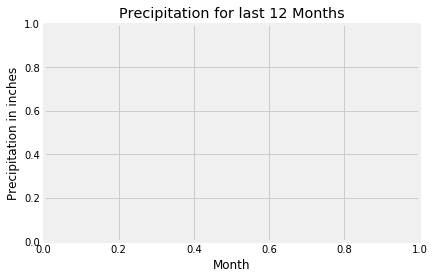

In [13]:
plt.title("Precipitation for last 12 Months")
plt.xlabel("Month")
plt.ylabel("Precipitation in inches")
months = ["Sep", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"]

In [14]:
y = df_last12months_precipitation["prcp"].tolist()
x = np.arange(0, len(df_last12months_precipitation.index.tolist()), 1)

In [15]:
month_total = len(y)
month_step_xticks = int((month_total / 12)*1.03)
plt.ylim = max(y) + 1
tick_locations = [x+55 for x in range(1, month_total, month_step_xticks)]

([<matplotlib.axis.XTick at 0x11e9f9c10>,
 <a list of 12 Text xticklabel objects>)

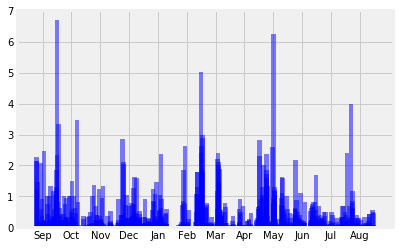

In [16]:
plt.bar(x, y, width=30, color="blue", alpha=0.5, align="edge")
plt.xticks(tick_locations, months)

In [17]:
plt.show()

![precipitation](Images/precipitation.png)

In [26]:
# Use Pandas to calcualte the summary statistics for the precipitation data

df_last12months_precipitation.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [19]:
# Design a query to show how many stations are available in this dataset?
totalnumber_of_stations = session.query(func.count(Station.station)).first()
print(f"Total number of stations available in this dataset: {str(totalnumber_of_stations[0])}")


Total number of stations available in this dataset: 9


In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
engine.execute("SELECT count(station), station FROM measurement GROUP BY station ORDER BY count(station) DESC").fetchall()


[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [21]:
active_stations_descending = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

df_active_stations_descending = pd.DataFrame(data=active_stations_descending, columns=['Station', 'Count'])
df_active_stations_descending.head()

,Station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612


In [23]:
# Choose the station with the highest number of temperature observations.
station_with_most_observations = df_active_stations_descending["Station"][0]
most_observations = df_active_stations_descending["Count"][0]
print(f"Station with most obs is ({most_observations}): {station_with_most_observations}")

Station with most obs is (2772): USC00519281


In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


[(54.0, 85.0, 71.66378066378067)]

In [28]:
station_activity = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

In [29]:
for row in reversed(station_activity):                                       # extracts station with most activity
    most_active_station=row.station
    most_active_name=str(row.name)

In [30]:
most_active_station_tobs = session.query(Measurement.tobs).\
filter(Measurement.station == most_active_station, Measurement.station == Station.station,\
       Measurement.date >="2016-08-24", Measurement.date <="2017-08-23").all()

In [31]:
temperatures = [temp[0] for temp in most_active_station_tobs] 

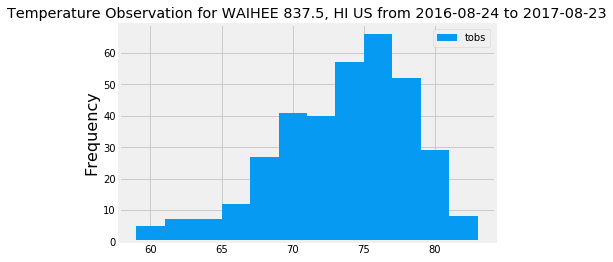

In [32]:
plt.hist(temperatures, bins=12, color='xkcd:azure')                          # plots the data
plt.title("Temperature Observation for %s from 2016-08-24 to 2017-08-23" % (most_active_name))
plt.ylabel('Frequency', fontsize=16)
labels = ['tobs']
plt.legend(labels)
plt.show()

In [25]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_frequencies = session.query(Measurement.tobs).\
    filter(Measurement.date >= '2016-08-24').\
    filter(Measurement.station == station_with_most_observations).\
    order_by(Measurement.tobs).all()
    
temperature_frequencies

[(59.0),
 (59.0),
 (59.0),
 (60.0),
 (60.0),
 (61.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (63.0),
 (63.0),
 (63.0),
 (63.0),
 (64.0),
 (64.0),
 (64.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 

![precipitation](Images/station-histogram.png)

In [33]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [36]:
def last_year_dates(start_date, end_date):
    """ Corresponding dates from previous year
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        start_date (string)
        end_date (string)
    """
    lst_start_date = start_date.split('-')
    lst_end_date = end_date.split('-')
    lastyear_start_year = int(lst_start_date[0]) - 1
    lastyear_end_year = int(lst_end_date[0]) - 1
    ly_start_date = f"{lastyear_start_year}-{lst_start_date[1]}-{lst_start_date[2]}"
    ly_end_date = f"{lastyear_end_year}-{lst_end_date[1]}-{lst_end_date[2]}"
    
    return (ly_start_date, ly_end_date)

In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


In [37]:
trip_start = '2015-04-20'
trip_end = '2015-04-28'



In [38]:
average_trip_temps = calc_temps(trip_start, trip_end)

In [39]:
(lastyear_start_date, lastyear_end_date) = last_year_dates(trip_start, trip_end)



In [40]:
import seaborn 

yerr_val = average_trip_temps[0][2] - average_trip_temps[0][0]
y = [average_trip_temps[0][1]]
x = 0

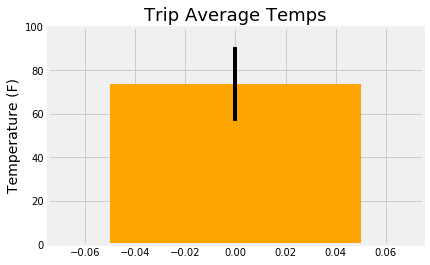

In [49]:
fig, ax = plt.subplots()
ax.set_ylabel("Temperature (F)", fontsize=14)
ax.set_title("Trip Average Temps", fontsize=18)

ax.bar(x, y, width=.1, color="orange", yerr=yerr_val)
ax.set_xlim(-.075, .075)
ax.set_ylim(0, 100)
ax.set_xbound(lower=-.075, upper=.075)
ax.tick_params(axis='x', which='both', bottom='off', top='off', labelbottom='off') 
plt.show()

<IPython.core.display.Javascript object>


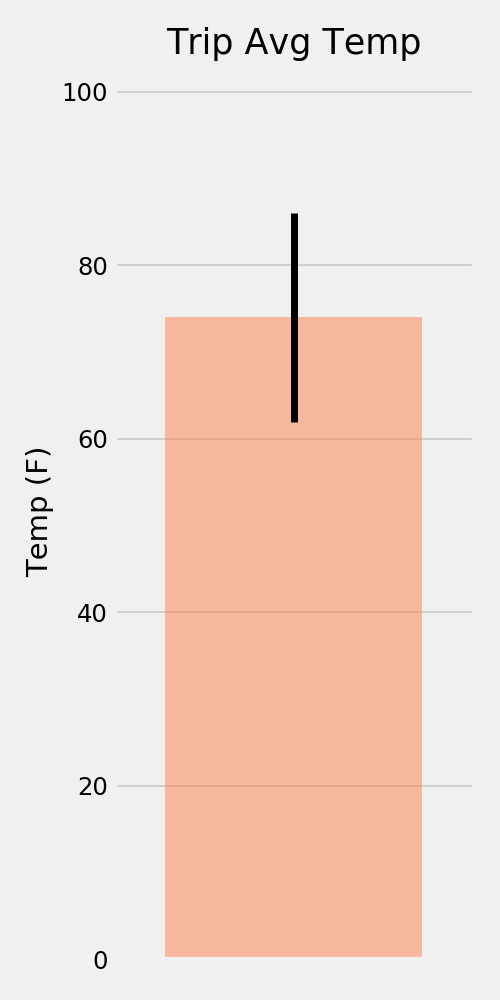

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation




[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


In [53]:
rainfall_by_station_lastyear = session.query(Measurement.station, func.sum(Measurement.prcp)).\
    filter(Measurement.date >= lastyear_start_date).\
    filter(Measurement.date <= lastyear_end_date).\
    group_by(Measurement.station).\
    order_by(func.sum(Measurement.prcp).desc()).all()
rainfall_by_station_lastyear


[('USC00516128', 8.379999999999999),
 ('USC00519281', 2.13),
 ('USC00513117', 1.04),
 ('USC00519523', 0.6799999999999999),
 ('USC00514830', 0.45999999999999996),
 ('USC00511918', 0.26),
 ('USC00519397', 0.21000000000000002),
 ('USC00517948', 0.09)]

In [55]:
query_to_run = f"SELECT station, sum(prcp) FROM measurement WHERE date >= '{lastyear_start_date}' AND date <= '{lastyear_end_date}' "\
            "GROUP BY station "\
            "ORDER BY sum(prcp) DESC"
print(query_to_run)
engine.execute(query_to_run).fetchall()

SELECT station, sum(prcp) FROM measurement WHERE date >= '2014-04-20' AND date <= '2014-04-28' GROUP BY station ORDER BY sum(prcp) DESC


[('USC00516128', 8.379999999999999),
 ('USC00519281', 2.13),
 ('USC00513117', 1.04),
 ('USC00519523', 0.6799999999999999),
 ('USC00514830', 0.45999999999999996),
 ('USC00511918', 0.26),
 ('USC00519397', 0.21000000000000002),
 ('USC00517948', 0.09)]

## Optional Challenge Assignment

In [67]:
import datetime  

In [68]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(target_date):
    """ function daily_normals
        parameters: target_date (string)
        returns: list
        extracts data using a SQL Alchemy query and returns list
        of averages of min, avg, and max temperature.
    """
    temp_list = []
    query = session.query(Measurement.tobs).filter(Measurement.date.like('%' + get_pdate(target_date))).all()
    temperatures = [temp[0] for temp in query]
    temp_list.append(target_date)
    temp_list.append(min(temperatures))
    temp_list.append(np.mean(temperatures))
    temp_list.append(max(temperatures))
    
    return temp_list

In [69]:
def get_pdate(target):
    """ function get_pdate 
        parameters: target (string)
        returns: string
        splits input string in date format and returns
        partial date in %m-%d format.
    """
    target_parse = target.split('-')
    return target_parse[1] + '-' + target_parse[2]

In [70]:
def get_date_list(start_date, end_date):
    """ function get_date_list
        parameters: start_date (string), end_date (string)
        returns: list
        extracts all dates between start_date and end_date
        and returns dates in %Y-%m-%d format.
    """
    date_list = []
    
    tsds = start_date.split('-')
    teds = end_date.split('-')
    
    begin = datetime.date(int(tsds[0]), int(tsds[1]), int(tsds[2]))
    end = datetime.date(int(teds[0]), int(teds[1]), int(teds[2]))

    next_day = begin
    while True:
        if next_day > end:
            break
        date_list.append(str(next_day))
        next_day += datetime.timedelta(days=1)
    
    return date_list

In [71]:
def get_prev_year_date(target):
    """ function get_prev_year_date
        parameters: target (string)
        returns: string
        disassembles string and subtracts 1 from year portion
        returns parameter input on error
    """
    try:
        xl = target.split('-')
        xc = (str(int(xl[0])-1)) + '-' + xl[1] + '-' + xl[2]
        return xc
    except:
        return target

In [72]:
trip_start_date = '2018-07-01'                                               # selected trip start and end dates
trip_end_date = '2018-07-11'

In [73]:
start_conv = get_prev_year_date(trip_start_date)                             # gets previous year start and end dates
end_conv = get_prev_year_date(trip_end_date)

In [74]:
target_date_list = get_date_list(start_conv, end_conv)

data_list = []                                                               # initializes empty list
for item in target_date_list:
    data_list.append(daily_normals(item)) 

In [75]:
daily_normals_df = pd.DataFrame(data_list, columns=['date','tmin', 'tavg', 'tmax'])
daily_normals_df = daily_normals_df.set_index('date')  

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [76]:
daily_normals_df  

,tmin,tavg,tmax
date,,,
2017-07-01,67.0,74.777778,81.0
2017-07-02,68.0,75.403846,82.0
2017-07-03,68.0,75.320755,87.0
2017-07-04,70.0,76.571429,81.0
2017-07-05,66.0,75.000000,81.0
2017-07-06,69.0,75.000000,81.0
2017-07-07,69.0,74.910714,82.0
2017-07-08,69.0,76.083333,83.0
2017-07-09,68.0,76.192982,83.0


In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


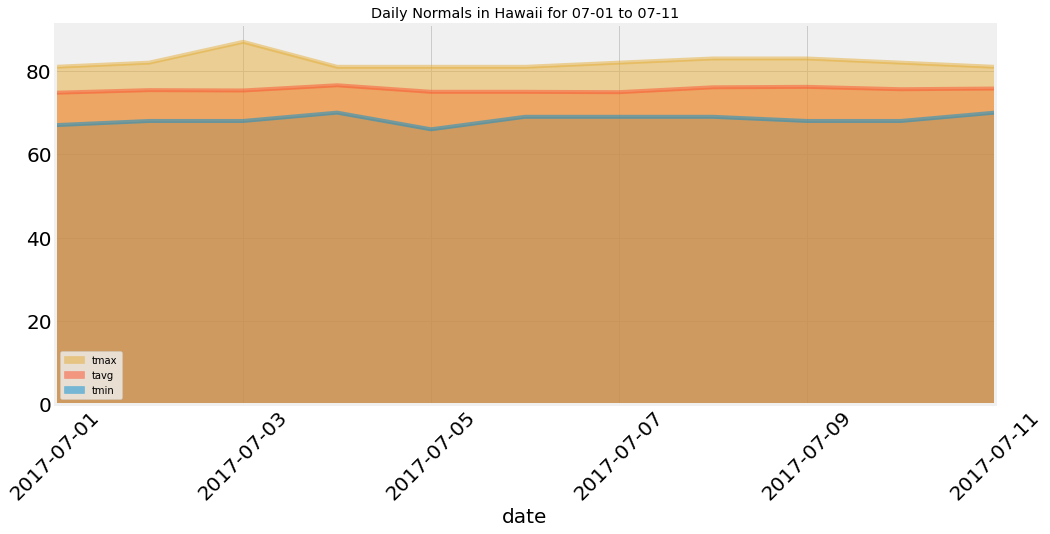

In [78]:
# Plot the daily normals as an area plot with `stacked=False`
daily_normals_df.plot(figsize=(15, 7),                                       # plots the data
                      kind='area',
                      sort_columns=True, 
                      rot=45, 
                      use_index=True, 
                      title='Daily Normals in Hawaii for %s to %s' % (get_pdate(start_conv), get_pdate(end_conv)), 
                      stacked=False,
                      legend='reverse',
                      fontsize=20,
                      grid=True,
                     ) 

plt.xlabel('date', fontsize=20)
plt.show()